In [1]:
%load_ext autoreload
%autoreload 2

maxRemovePercent = 40
minSnpCount =1
vcf_path = './simulation/simulate.vcf'

from run_span_detection import find_for_items

find_for_items(maxRemovePercent,minSnpCount, None, None, vcf_path)

0, 439
checking position 1 of 30
Done with length =22
checking position 2 of 30
Done with length =21
checking position 3 of 30
Done with length =20
checking position 4 of 30
Done with length =26
checking position 5 of 30
Done with length =25
checking position 6 of 30
Done with length =24
checking position 7 of 30
Done with length =23
checking position 8 of 30
Done with length =22
checking position 9 of 30
Done with length =21
checking position 10 of 30
Done with length =20
checking position 11 of 30
Done with length =19
checking position 12 of 30
Done with length =18
checking position 13 of 30
Done with length =17
checking position 14 of 30
Done with length =16
checking position 15 of 30
Done with length =15
checking position 16 of 30
Done with length =14
checking position 17 of 30
Done with length =13
checking position 18 of 30
Done with length =12
checking position 19 of 30
Done with length =11
checking position 20 of 30
Done with length =10
checking position 21 of 30
Done with lengt

In [2]:
print('HERE')
from run_generate_times import infer_times, get_all_haplo_input_files
print('HERE')

dirs = get_all_haplo_input_files()
X=None
print('HERE?')
for path in dirs:
    X = infer_times(path, minSnpCount, vcf_path)

HERE


: 

: 

[[1552, 1681.0, <tskit.trees.TreeSequence at 0x12e1e0c70>, 31054.828027712498],
 [1552, 1928.5, <tskit.trees.TreeSequence at 0x12e10e190>, 27019.592938466725],
 [1552, 3334.0, <tskit.trees.TreeSequence at 0x12d14df10>, 16469.157828978616],
 [1552, 5677.0, <tskit.trees.TreeSequence at 0x12e1d9550>, 11254.193095774499],
 [1552, 7963.0, <tskit.trees.TreeSequence at 0x12d381fd0>, 9390.953207265018],
 [1552, 9217.0, <tskit.trees.TreeSequence at 0x12e213100>, 8474.077025349625],
 [1552, 9405.5, <tskit.trees.TreeSequence at 0x12d3422e0>, 8353.71639078819],
 [1552, 9516.5, <tskit.trees.TreeSequence at 0x12d249640>, 8572.526411927733],
 [1552, 9601.0, <tskit.trees.TreeSequence at 0x12d249eb0>, 8523.105558313644],
 [1552, 11783.5, <tskit.trees.TreeSequence at 0x12d0f77f0>, 7454.913361575651],
 [1552, 14033.0, <tskit.trees.TreeSequence at 0x12d0e8cd0>, 6626.325843813417],
 [1552, 14437.0, <tskit.trees.TreeSequence at 0x12e24aa90>, 6497.890991213244],
 [1552, 15374.5, <tskit.trees.TreeSequence at 

In [47]:

from utils import read_full_timed_mosaics

spans = read_full_timed_mosaics(minSnpCount, vcf_path, None)

Parsing file ./result/infer_time_from0_to21.txt


In [48]:
spans[1]

[1552, 1928.5, 0, 27019.592938466725, 3]

In [2]:
from SNPDataSet import get_snp_dfs

mutation_df = get_snp_dfs(minSnpCount, vcf_path)


In [15]:
class ancestorDataGenerator:

    def __init__(self, mosaics, mutations):
        self.mosaics = mosaics
        self.last_position = max(list(zip(*self.mosaics))[1])
        self.first_position = min(list(zip(*self.mosaics))[0])
        self.states = {}
        self.mosaic_positions = self.get_mosaic_positions()
        self.mutations_dict = self._generate_mutation_dict(mutations)
        self.mut_positions = self._generate_mut_list(mutations)

    def _generate_mut_list(self,mutation_df ):
        A= mutation_df['position'].unique()
        A.sort()
        muts = [p for p in A]
        return muts

    def _generate_mutation_dict(self, mutation_df):
        mutation_dict = dict()
        for i, row in mutation_df.iterrows():
            key = f"{row['position']}__{row['sample']}"
            mutation_dict[key] = True
        return mutation_dict

    def get_mosaic_positions(self):
        l1 = list(list(zip(*self.mosaics))[0])
        l2 = list(list(zip(*self.mosaics))[1])
        l2.extend(l1)
        l= list(set(l2))
        l.sort()
        return l


aDG = ancestorDataGenerator(spans, mutation_df)

In [16]:
aDG.mutations_dict

{'1652__tsk_1_1': True,
 '1652__tsk_2_0': True,
 '1652__tsk_2_1': True,
 '1652__tsk_3\n_1': True,
 '1710__tsk_0_0': True,
 '1710__tsk_1_0': True,
 '2147__tsk_0_0': True,
 '2147__tsk_0_1': True,
 '2147__tsk_1_0': True,
 '4521__tsk_0_1': True,
 '4521__tsk_3\n_0': True,
 '6833__tsk_0_0': True,
 '6833__tsk_1_1': True,
 '6833__tsk_2_0': True,
 '6833__tsk_2_1': True,
 '6833__tsk_3\n_0': True,
 '6833__tsk_3\n_1': True,
 '9093__tsk_1_0': True,
 '9093__tsk_3\n_0': True,
 '9341__tsk_1_0': True,
 '9341__tsk_3\n_0': True,
 '9470__tsk_0_0': True,
 '9470__tsk_0_1': True,
 '9470__tsk_2_1': True,
 '9563__tsk_1_0': True,
 '9563__tsk_3\n_0': True,
 '9639__tsk_1_0': True,
 '9639__tsk_3\n_0': True,
 '13928__tsk_1_1': True,
 '13928__tsk_2_0': True,
 '13928__tsk_3\n_1': True,
 '14138__tsk_0_0': True,
 '14138__tsk_0_1': True,
 '14138__tsk_1_1': True,
 '14138__tsk_2_0': True,
 '14138__tsk_2_1': True,
 '14138__tsk_3\n_0': True,
 '14138__tsk_3\n_1': True,
 '14736__tsk_0_0': True,
 '14736__tsk_0_1': True,
 '1473

In [12]:
muts

[1652,
 1710,
 2147,
 4521,
 6833,
 9093,
 9341,
 9470,
 9563,
 9639,
 13928,
 14138,
 14736,
 16013,
 17134,
 17745,
 17902,
 18607,
 19052,
 19366,
 19720]

In [57]:
X.ts_list[0][2].num_samples
# .num_nodes

100

In [58]:
print(X.ts_list[20][2].at(0).draw(format="unicode"))

                                                                                                   71                                                                                                     
┏━┳━┳━┳━┳━┳━┳━┳━┳━┳━━┳━━┳━━┳━━┳━━┳━━┳━━┳━━┳━━┳━━┳━━┳━━┳━━┳━━┳━━┳━━┳━━┳━━┳━━┳━━┳━━┳━━┳━━┳━━┳━━┳━━┳━━┳┻━┳━━┳━━┳━━┳━━┳━━┳━━┳━━┳━━┳━━┳━━┳━━┳━━┳━━┳━━┳━━┳━━┳━━┳━━┳━━┳━━┳━━┳━━┳━━┳━━┳━━┳━━┳━━┳━━┳━━┳━━┳━━┳━━┳━━┓
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70



In [60]:
for x in X.ts_list:
    ts = x[2]
    internals = (ts.num_nodes-ts.num_samples)
    # internals = (ts.num_mutations)
    if internals>1:
        print(internals)

In [37]:
X.ts_list[0][2].num_mutations


0

In [3]:
mutation_df

,position,sample,state
0,519,tsk_12_0,1
1,519,tsk_36_0,1
2,832,tsk_1_1,1
3,832,tsk_6_0,1
4,832,tsk_34_0,1
...,...,...,...
434,18194,tsk_40_1,1
435,18194,tsk_46_0,1
436,19475,tsk_32_1,1
437,19475,tsk_37_0,1


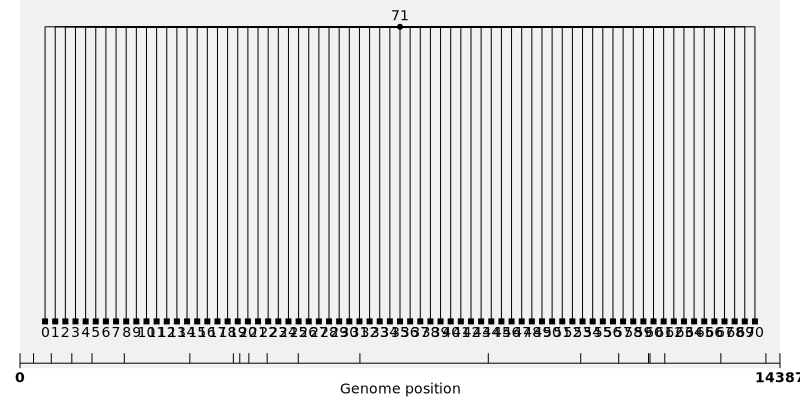

In [8]:
from IPython.display import SVG

ancestors_ts = X.ts_list[20][2]
svg = ancestors_ts.draw_svg('./simulation/ancestors_ts.svg', size= [800, 400])
display(SVG(svg))


In [15]:
for i in X.ts_list:
    for r in i[4]:
        for m in r[1]:
            if m !=0:
                print(m)


In [18]:
X.ts_list[20][5]


{'519__tsk_12_0': True,
 '519__tsk_36_0': True,
 '832__tsk_1_1': True,
 '832__tsk_6_0': True,
 '832__tsk_34_0': True,
 '1190__tsk_0_0': True,
 '1190__tsk_0_1': True,
 '1190__tsk_1_0': True,
 '1190__tsk_2_0': True,
 '1190__tsk_2_1': True,
 '1190__tsk_3_0': True,
 '1190__tsk_3_1': True,
 '1190__tsk_4_0': True,
 '1190__tsk_4_1': True,
 '1190__tsk_8_0': True,
 '1190__tsk_10_1': True,
 '1190__tsk_11_0': True,
 '1190__tsk_12_0': True,
 '1190__tsk_14_0': True,
 '1190__tsk_14_1': True,
 '1190__tsk_15_1': True,
 '1190__tsk_17_0': True,
 '1190__tsk_17_1': True,
 '1190__tsk_18_0': True,
 '1190__tsk_18_1': True,
 '1190__tsk_19_0': True,
 '1190__tsk_19_1': True,
 '1190__tsk_20_0': True,
 '1190__tsk_22_1': True,
 '1190__tsk_23_1': True,
 '1190__tsk_24_1': True,
 '1190__tsk_25_0': True,
 '1190__tsk_26_0': True,
 '1190__tsk_26_1': True,
 '1190__tsk_27_1': True,
 '1190__tsk_28_0': True,
 '1190__tsk_29_0': True,
 '1190__tsk_29_1': True,
 '1190__tsk_31_0': True,
 '1190__tsk_33_1': True,
 '1190__tsk_35_0'